In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import sympy

In [4]:
z, t, l, r, z, x, w, y = sympy.symbols('z ϴ l r z x w y')

sol = sympy.nonlinsolve([
    sympy.Eq(y**2 + (r - x)**2, r**2),
    sympy.Eq(l, r * t),
    sympy.Eq(sympy.sin(t), y / r),
], [x, y, r])

In [5]:
x, y, r=  map(lambda e: sympy.lambdify([l, t], e), sol.args[1])

In [6]:
thetas = np.linspace(0.01, pi-0.01, 100)

In [7]:
pi

3.141592653589793

In [8]:
x(100, 45 / 360 * 2 * pi)

37.29232285780566

In [9]:
y(100, 45 / 360 * 2 * pi)

90.0316316157106

(-3.0979514372381267,
 76.05688851564273,
 -104.98228395818029,
 4.664629605120187)

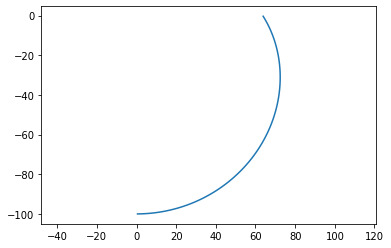

In [10]:
plot(x(100, thetas), -y(100, thetas))
plt.axis('equal')

In [11]:
from octablaze import planners

In [12]:
!ls

REBUG.ipynb


In [14]:
import pandas as pd
import cvxpy as cvx

In [15]:
if False:
    df = pd.read_clipboard()
    meas_bias = cvx.Variable(df.fwd.size)

    fwd = df.fwd.values - meas_bias
    rev = df.rev.values - meas_bias[::-1]

    err = cvx.abs(fwd - rev)

    prob = cvx.Problem(cvx.Minimize(cvx.sum(err)))
    prob.solve()
    plot(meas_bias.value)
    af, bf = np.linalg.lstsq(np.vstack([df.fwd.index, np.ones_like(df.fwd)]).T, df.fwd, rcond=None)[0]
    ar, br = np.linalg.lstsq(np.vstack([df.rev.index, np.ones_like(df.rev)]).T, df.rev, rcond=None)[0]

    plot(df.fwd - a * df.fwd.index + b)
    plot(df.rev - a * df.rev.index + b)

In [17]:
from scipy import interpolate


In [23]:
from fabric.connection import Connection
import pickle

with Connection('tentalux.local', 'pi') as c, c.sftp() as sftp,   \
         sftp.open('/home/pi/tentalux-soft/plans.pkl', 'rb') as f:
    try:
        while True:
            fplan, o1, o2 = pickle.load(f)
    except EOFError:
        pass

ModuleNotFoundError: No module named 'tentalux_soft'

In [ ]:
import attr

In [ ]:
fplan

In [ ]:
plot([s.dtime for s in fplan if s.stepper == 'x'])

In [ ]:
objective = attr.evolve(o1)
plan = planners.advanced_planner(objective)
position_per_atom = plan.positions
scheduling_atom = plan.objective.scheduling_step_sec


In [ ]:
plot([s.wait_time_sec for s in plan.steps])